### This file comprises of various data visualization plots for the audio data

In [25]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import librosa.display
import csv

In [57]:
# Reading in the data
df = pd.read_csv('audio_class.csv')
df.head()

,filename,spectral_centroid,rmse,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
clap,(1).wav,2051.572081,0.008992,4060.966353,0.134100,-605.536610,56.630991,-23.340395,11.531782,-11.342088,7.796704,-12.405108,2.648839,0.432009,1.499365,-1.880858,-1.527689,0.625778,clap
clap,(10).wav,2058.214164,0.005593,4190.654963,0.113909,-658.675436,32.362119,-18.051734,10.146358,-5.399427,10.915433,-5.938106,4.143925,-2.083303,-0.279218,-1.515553,-3.099555,-1.432691,clap
clap,(100).wav,2843.481250,0.002820,5076.793352,0.136552,-686.391418,19.337809,11.524174,51.081119,-2.689775,14.175341,22.585746,16.809678,-5.130494,12.618686,25.561120,1.495639,-1.316608,clap
clap,(101).wav,2224.800218,0.001412,4658.933844,0.149073,-610.523518,101.509821,-81.046570,-23.512760,-66.012875,24.605814,-56.382617,-13.351940,-30.259235,-5.224484,-16.138139,-30.078784,-4.236884,clap
clap,(102).wav,1275.823458,0.004507,1788.112294,0.084689,-518.568838,165.982720,-46.998002,-47.874393,-24.953285,-3.947731,-17.928818,-21.016032,-14.468609,-2.527688,-7.698056,-14.593245,-6.349583,clap


In [28]:
audio = list(df['label'].unique())
audio

['clap', 'cough', 'music', 'talking', 'train']

### waveplots for audio data

In [103]:
def waveplot(audio):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(audio):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'vis/{kind} (5).wav')
        #X = librosa.stft(y)
        #Xdb = librosa.amplitude_to_db(abs(X))
        # Computing the mel spectrogram
        #spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        #spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.waveplot(y, sr=sr,ax = ax[i])
        ax[i].set_title(str(kind))

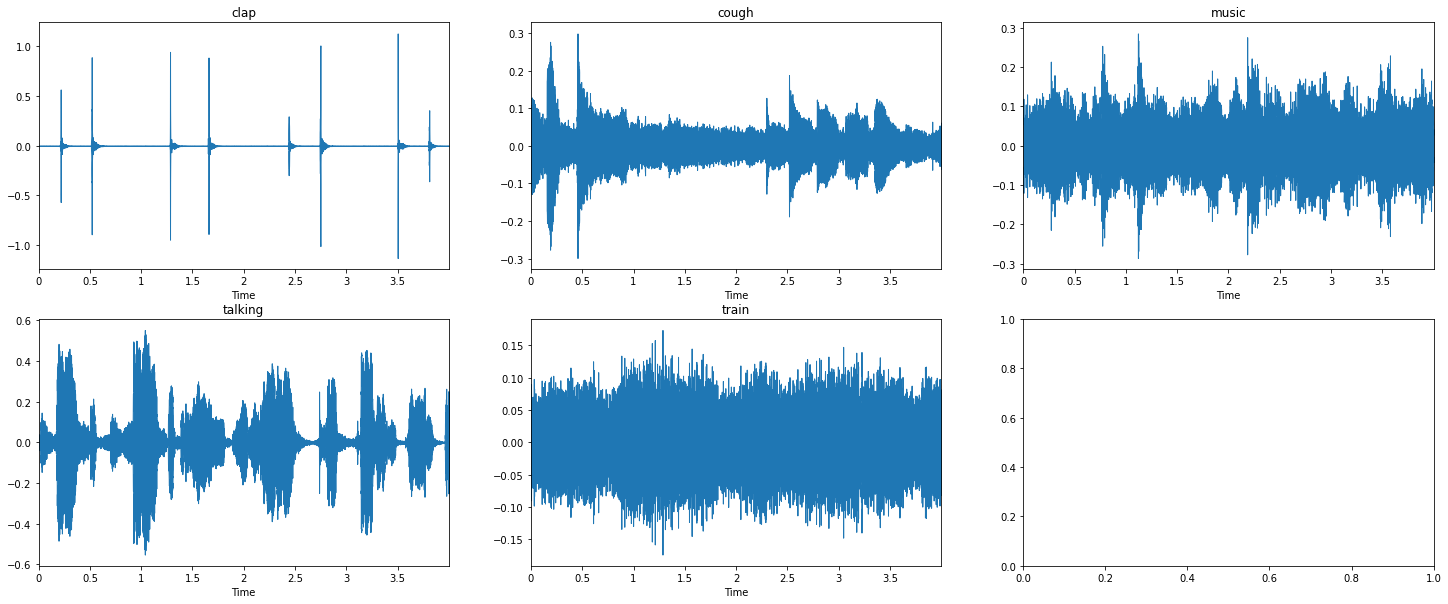

In [104]:
 waveplot(audio)

### spectograms of audio data

In [109]:
def spectrogram(audio):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(audio):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'vis/{kind} (5).wav')
        X = librosa.stft(y)
        Xdb = librosa.amplitude_to_db(abs(X))
        # Computing the mel spectrogram
        #spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        #spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax = ax[i]) 
        ax[i].set_title(str(kind))

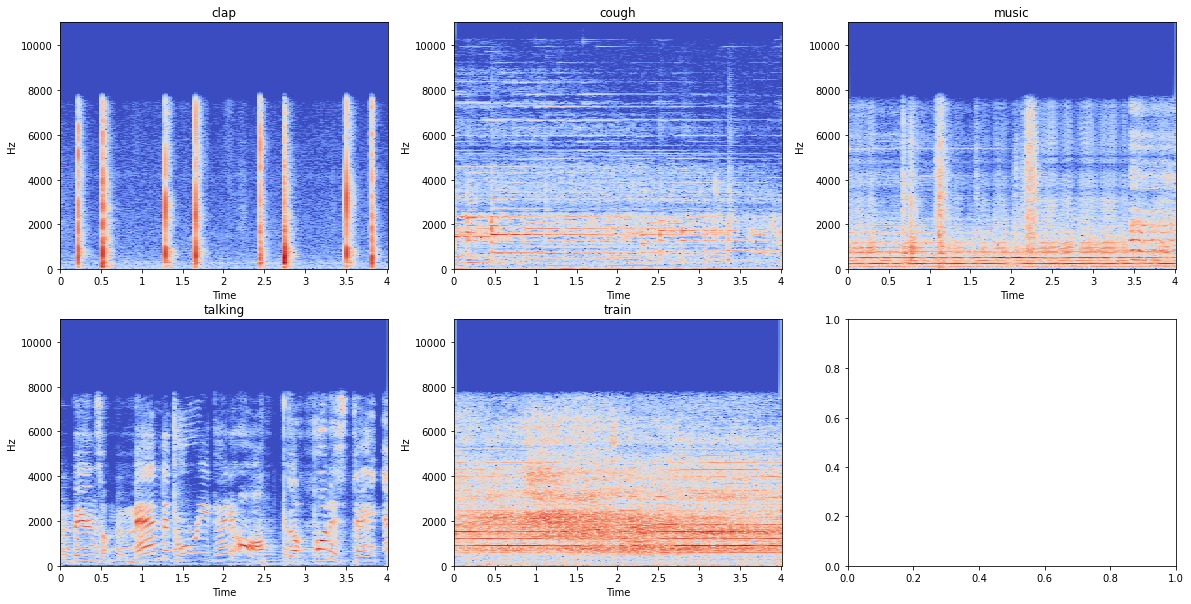

In [110]:
 spectrogram(audio)

### melspectograms of audio data

In [107]:
def spectrogram_subplots(audio):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(audio):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'vis/{kind} (5).wav')
        
        # Computing the mel spectrogram
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time', ax = ax[i])
        ax[i].set_title(str(kind))

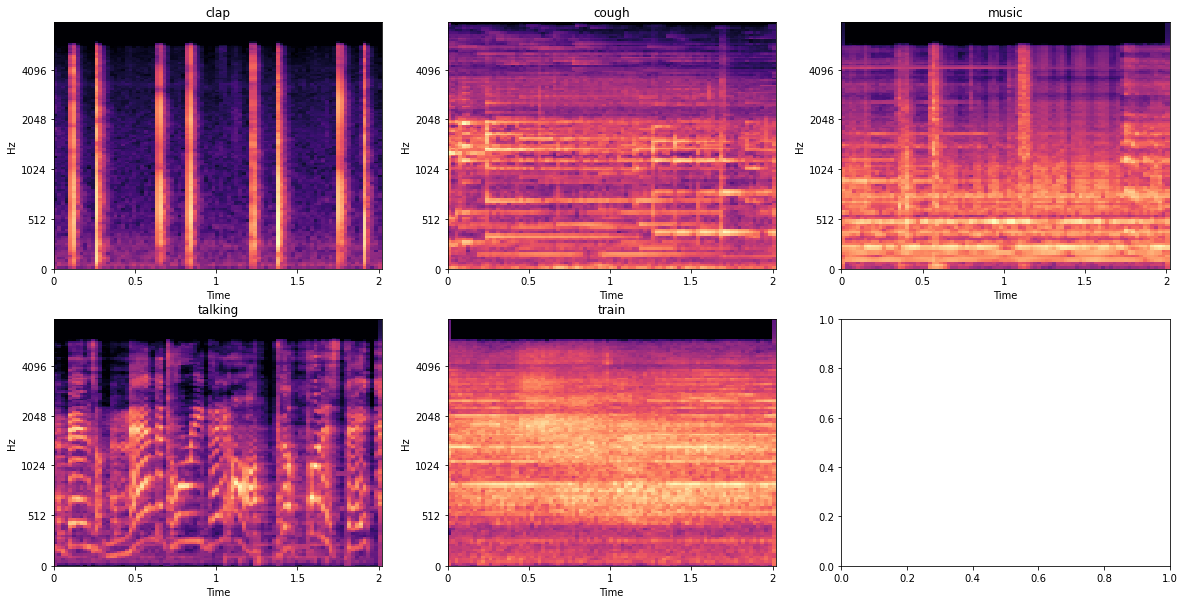

In [108]:
 spectrogram_subplots(audio)